## Dataset for Model_입출항 사건별 데이터셋 재구성

In [1]:
import warnings
warnings.filterwarnings('ignore')

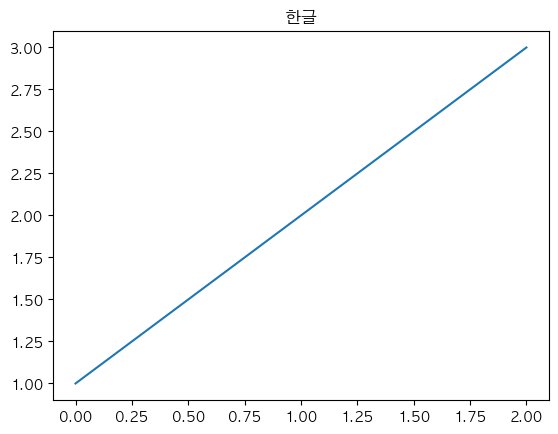

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="AppleGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

In [3]:
import pandas as pd

df = pd.read_csv('../data/울산_전처리_ver5.csv')

In [4]:
df.호출부호.value_counts()

100314     1704
122804     1459
091321     1035
038217     1019
114801      989
           ... 
V7A4832       1
5BQD3         1
V7A2614       1
VRPV5         1
D5XD8         1
Name: 호출부호, Length: 7323, dtype: int64

In [5]:
df

,항명,호출부호,선박명,입항횟수_연도,입항횟수_횟수,구분,입출,총톤수_x,입항일시,출항일시,...,GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,울산,185303,103동성호,2020.0,1.0,최종,출항,498,2020-01-01 00:10:00,2020-01-01 04:50,...,10.9,NaN,47.0,3.8,17.5,4.4,3.0,2.1,10.7,36.0
1,울산,088238,3동주,2020.0,1.0,최종,출항,700,2020-01-01 01:05:00,2020-01-01 08:15,...,12.2,1028.8,43.0,4.3,17.5,4.2,2.8,2.0,10.7,49.0
2,울산,DSRB9,SEOHAE GAS,2020.0,1.0,최종,출항,"2,689",2020-01-01 03:05:00,2020-01-01 14:55,...,15.3,1028.5,44.0,4.3,17.4,3.9,2.2,1.5,9.1,48.0
3,울산,D7CH,STAR CHALLENGER,2020.0,1.0,최종,출항,"9,955",2020-01-01 03:40:00,2020-01-01 13:30,...,15.3,1028.5,44.0,4.3,17.4,3.9,2.2,1.5,9.1,48.0
4,울산,D7SC,SKY CHEMI,2020.0,1.0,최종,출항,"1,772",2020-01-01 04:30:00,2020-01-01 20:40,...,14.4,1028.3,53.0,3.4,17.3,3.5,2.1,1.5,9.1,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143525,울산,130064,에이원,2022.0,114.0,최종,출항,431,2022-12-31 09:45:00,2022-12-31 16:15,...,14.4,1028.7,64.0,5.7,16.1,2.2,1.6,1.1,5.3,0.0
143526,울산,HOXG,SPRING NOTE,2022.0,31.0,최종,출항,"2,579",2022-12-31 10:05:00,2022-12-31 20:10,...,16.1,1029.3,60.0,5.6,16.1,2.3,1.5,1.1,5.8,36.0
143527,울산,200013,유성,2022.0,142.0,최종,출항,"1,998",2022-12-31 15:55:00,2022-12-31 23:15,...,9.8,1027.6,49.0,7.8,16.1,2.4,1.5,1.0,5.8,6.0
143528,울산,066597,한성8호,2022.0,22.0,최종,출항,164,2022-12-31 17:55:00,2022-12-31 20:40,...,8.2,1027.6,47.0,8.0,16.2,2.2,1.3,0.9,5.8,33.0


### 1. 호출부호, 입항일시 중복 컬럼 확인

- 호출부호, 입항일시 중복 확인

In [6]:
duplicate = df.duplicated(subset=['호출부호', '입항일시']).sum()
duplicate

71439

In [7]:
duplicated_rows = df[df.duplicated(subset=['호출부호', '입항일시'], keep=False)]
duplicated_rows

,항명,호출부호,선박명,입항횟수_연도,입항횟수_횟수,구분,입출,총톤수_x,입항일시,출항일시,...,GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
5,울산,3FSX4,YC KALMIA,2020.0,1.0,최종,출항,"4,688",2020-01-01 05:15:00,2020-01-03 14:30,...,13.5,1028.9,60.0,3.0,16.8,4.0,2.1,1.5,8.0,38.0
6,울산,3FSX4,YC KALMIA,2020.0,1.0,최종,출항,"4,688",2020-01-01 05:15:00,2020-01-03 14:30,...,13.5,1028.9,60.0,3.0,16.8,4.0,2.1,1.5,8.0,38.0
7,울산,160014,BUM KANG,2020.0,1.0,최종,출항,"1,615",2020-01-01 05:30:00,2020-01-02 02:30,...,13.5,1028.9,60.0,3.0,16.8,4.0,2.1,1.5,8.0,38.0
8,울산,160014,BUM KANG,2020.0,1.0,최종,출항,"1,615",2020-01-01 05:30:00,2020-01-02 02:30,...,13.5,1028.9,60.0,3.0,16.8,4.0,2.1,1.5,8.0,38.0
9,울산,130095,두라,2020.0,1.0,최종,출항,"1,716",2020-01-01 05:40:00,2020-01-02 11:00,...,13.5,1028.9,60.0,3.0,16.8,4.0,2.1,1.5,8.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143460,울산,185303,103동성호,2022.0,111.0,최종,출항,498,2022-12-29 21:55:00,2022-12-30 05:45,...,12.3,1031.0,50.0,7.5,17.4,2.2,1.4,1.0,8.0,33.0
143470,울산,210043,에이치와이 부산,2022.0,120.0,최종,출항,499,2022-12-30 01:20:00,2022-12-30 13:30,...,12.0,1031.4,58.0,5.9,17.3,2.4,1.5,1.1,8.0,27.0
143471,울산,210043,에이치와이 부산,2022.0,120.0,최종,출항,499,2022-12-30 01:20:00,2022-12-30 13:30,...,12.0,1031.4,58.0,5.9,17.3,2.4,1.5,1.1,8.0,27.0
143491,울산,176801,아크,2022.0,138.0,최종,출항,759,2022-12-30 12:50:00,2022-12-31 02:30,...,9.5,1031.6,61.0,5.9,17.2,2.3,1.4,1.0,8.0,20.0


In [8]:
data = duplicated_rows.copy()

In [9]:
data.columns

Index(['항명', '호출부호', '선박명', '입항횟수_연도', '입항횟수_횟수', '구분', '입출', '총톤수_x', '입항일시',
       '출항일시', '수리일시', '항해구분', '계선장소_코드', '계선장소_숫자', '계선장소명', '선박용도', '순번',
       '시설사용횟수', '신고톤수', '지정시설_코드', '지정시설_번호', '지정시설명', '지정일시(FROM)',
       '지정일시(TO)', '사용목적명', '예보일시', '허가유무', '접안_대기시간', 'Service_Time_End',
       'Anchor', 'Service_Time_Start', 'Service_Time', '접안_대기시간_NumDays',
       'Service_Time_NumDays', '접안_대기시간_일', '접안_대기시간_시간', '접안_대기시간_분',
       'Service_Time_일', 'Service_Time_시간', 'Service_Time_분', '대기율', '재화중량톤수',
       '선박제원(총길이, m)', '선박제원(너비, m)', '만재흘수(m)', '깊이(m)', '길이1(m)',
       '선박국적(code)', '선박국적(이름)', 'ETA_Year', 'ETA_Month', 'ETA_Day',
       'ETA_Hour', 'ETA_Minute', '일시', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
       '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
       '평균파고(m)', '파주기(sec)', '파향(deg)'],
      dtype='object')

#### 샘플 확인

In [10]:
temp = data[['호출부호','입항일시','출항일시','사용목적명','접안_대기시간_분','지정일시(FROM)',
       '지정일시(TO)','Service_Time_분','Service_Time_Start','Service_Time_End','대기율']]

In [11]:
temp

,호출부호,입항일시,출항일시,사용목적명,접안_대기시간_분,지정일시(FROM),지정일시(TO),Service_Time_분,Service_Time_Start,Service_Time_End,대기율
5,3FSX4,2020-01-01 05:15:00,2020-01-03 14:30,급유,0,2020-01-01 05:15:00,2020-01-02 22:40:00,3435,2020-01-01 05:15:00,2020-01-03 14:30:00,0.000000
6,3FSX4,2020-01-01 05:15:00,2020-01-03 14:30,적하,0,2020-01-02 23:30:00,2020-01-03 14:30:00,3435,2020-01-01 05:15:00,2020-01-03 14:30:00,0.000000
7,160014,2020-01-01 05:30:00,2020-01-02 02:30,접안대기,517,2020-01-01 05:30:00,2020-01-01 14:07:00,743,2020-01-01 14:07:00,2020-01-02 02:30:00,0.695828
8,160014,2020-01-01 05:30:00,2020-01-02 02:30,적하,0,2020-01-01 15:30:00,2020-01-02 02:30:00,1260,2020-01-01 05:30:00,2020-01-02 02:30:00,0.000000
9,130095,2020-01-01 05:40:00,2020-01-02 11:00,적하,0,2020-01-01 08:30:00,2020-01-01 20:30:00,1760,2020-01-01 05:40:00,2020-01-02 11:00:00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
143460,185303,2022-12-29 21:55:00,2022-12-30 05:45,적하,0,2022-12-30 00:10:00,2022-12-30 05:45:00,470,2022-12-29 21:55:00,2022-12-30 05:45:00,0.000000
143470,210043,2022-12-30 01:20:00,2022-12-30 13:30,기타,0,2022-12-30 01:20:00,2022-12-30 08:35:00,730,2022-12-30 01:20:00,2022-12-30 13:30:00,0.000000
143471,210043,2022-12-30 01:20:00,2022-12-30 13:30,적하,0,2022-12-30 09:00:00,2022-12-30 13:30:00,730,2022-12-30 01:20:00,2022-12-30 13:30:00,0.000000
143491,176801,2022-12-30 12:50:00,2022-12-31 02:30,기타,0,2022-12-30 12:50:00,2022-12-30 22:50:00,820,2022-12-30 12:50:00,2022-12-31 02:30:00,0.000000


In [12]:
temp.loc[temp['사용목적명'] == '출항 대기', '출항대기시간_분'] = (pd.to_datetime(temp['지정일시(TO)']) - pd.to_datetime(temp['지정일시(FROM)'])).dt.total_seconds() / 60

In [13]:
temp['출항대기시간_분'].fillna(0, inplace = True)

In [14]:
temp

,호출부호,입항일시,출항일시,사용목적명,접안_대기시간_분,지정일시(FROM),지정일시(TO),Service_Time_분,Service_Time_Start,Service_Time_End,대기율,출항대기시간_분
5,3FSX4,2020-01-01 05:15:00,2020-01-03 14:30,급유,0,2020-01-01 05:15:00,2020-01-02 22:40:00,3435,2020-01-01 05:15:00,2020-01-03 14:30:00,0.000000,0.0
6,3FSX4,2020-01-01 05:15:00,2020-01-03 14:30,적하,0,2020-01-02 23:30:00,2020-01-03 14:30:00,3435,2020-01-01 05:15:00,2020-01-03 14:30:00,0.000000,0.0
7,160014,2020-01-01 05:30:00,2020-01-02 02:30,접안대기,517,2020-01-01 05:30:00,2020-01-01 14:07:00,743,2020-01-01 14:07:00,2020-01-02 02:30:00,0.695828,0.0
8,160014,2020-01-01 05:30:00,2020-01-02 02:30,적하,0,2020-01-01 15:30:00,2020-01-02 02:30:00,1260,2020-01-01 05:30:00,2020-01-02 02:30:00,0.000000,0.0
9,130095,2020-01-01 05:40:00,2020-01-02 11:00,적하,0,2020-01-01 08:30:00,2020-01-01 20:30:00,1760,2020-01-01 05:40:00,2020-01-02 11:00:00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
143460,185303,2022-12-29 21:55:00,2022-12-30 05:45,적하,0,2022-12-30 00:10:00,2022-12-30 05:45:00,470,2022-12-29 21:55:00,2022-12-30 05:45:00,0.000000,0.0
143470,210043,2022-12-30 01:20:00,2022-12-30 13:30,기타,0,2022-12-30 01:20:00,2022-12-30 08:35:00,730,2022-12-30 01:20:00,2022-12-30 13:30:00,0.000000,0.0
143471,210043,2022-12-30 01:20:00,2022-12-30 13:30,적하,0,2022-12-30 09:00:00,2022-12-30 13:30:00,730,2022-12-30 01:20:00,2022-12-30 13:30:00,0.000000,0.0
143491,176801,2022-12-30 12:50:00,2022-12-31 02:30,기타,0,2022-12-30 12:50:00,2022-12-30 22:50:00,820,2022-12-30 12:50:00,2022-12-31 02:30:00,0.000000,0.0


### 2. 코드 설계

####  '호출부호','입항일시'가 중복된 행들의 대푯값만 new 데이터프레임으로 추출
- 컬럼 : 호출부호,입항일시,출항일시, 접안_대기시간_분,service_Time_분
-  호출부호,입항일시,출항일시 는 중복행들 중에 첫번째 값만 입력
- '호출부호','입항일시'가 중복된 행중에 '접안_대기시간_분' 값중 가장 큰 값을 new 의 '접안_대기시간_분'값에 입력
- '호출부호','입항일시'가 중복된 행중에 'Service_Time_Start' 값이 제일 큰 값을 new 'Service_Time_Start'값에 입력
- '호출부호','입항일시'가 중복된 행중에 'Service_Time_End' 값이 제일 작은 값을 new 'Service_Time_End'값에 입력

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143530 entries, 0 to 143529
Data columns (total 67 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   항명                    143530 non-null  object 
 1   호출부호                  143530 non-null  object 
 2   선박명                   143530 non-null  object 
 3   입항횟수_연도               143530 non-null  float64
 4   입항횟수_횟수               143530 non-null  float64
 5   구분                    143530 non-null  object 
 6   입출                    143530 non-null  object 
 7   총톤수_x                 143530 non-null  object 
 8   입항일시                  143530 non-null  object 
 9   출항일시                  143530 non-null  object 
 10  수리일시                  143495 non-null  object 
 11  항해구분                  143530 non-null  object 
 12  계선장소_코드               143530 non-null  object 
 13  계선장소_숫자               143530 non-null  int64  
 14  계선장소명                 143530 non-null  object 
 15  

- 출항대기시간 컬럼 생성 및 불필요한 컬럼 삭제

In [16]:
df.loc[df['사용목적명'] == '출항대기', '출항_대기시간_분'] = (pd.to_datetime(df['지정일시(TO)']) - pd.to_datetime(df['지정일시(FROM)'])).dt.total_seconds() / 60

In [17]:
df['출항_대기시간_분'].fillna(0, inplace = True)

In [18]:
df.drop(columns = 'Anchor', inplace = True)

### 3. 사건별 데이터셋 구성(입출항1)

In [23]:
import pandas as pd

grouped_df = df.groupby(['호출부호', '입항일시']).agg({
    '출항일시': 'first',
    '접안_대기시간_분': 'max',
    '출항_대기시간_분': 'max',
    'Service_Time_Start': 'max',
    'Service_Time_End': 'min',
    '계선장소_코드': 'first',  
    '계선장소_숫자': 'first',  
    '계선장소명': 'first', 
    '선박용도':'first'
}).reset_index()

new_df = pd.DataFrame(grouped_df, columns=['호출부호', '입항일시', '출항일시', '접안_대기시간_분', '출항_대기시간_분', 'Service_Time_Start', 'Service_Time_End', '계선장소_코드', '계선장소_숫자', '계선장소명','선박용도'])


In [24]:
new_df

,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,Service_Time_Start,Service_Time_End,계선장소_코드,계선장소_숫자,계선장소명,선박용도
0,000308,2020-01-05 11:30:00,2020-01-06 14:50,1125,0.0,2020-01-06 06:15:00,2020-01-06 14:50:00,MBO,1,온산1부두,산물선(벌크선)
1,000308,2020-02-27 08:50:00,2020-02-27 16:30,0,0.0,2020-02-27 08:50:00,2020-02-27 16:30:00,MB2,1,2부두 01,산물선(벌크선)
2,000308,2020-03-09 12:35:00,2020-03-12 15:40,0,0.0,2020-03-09 12:35:00,2020-03-12 15:40:00,MB1,1,1부두 01,산물선(벌크선)
3,000308,2020-03-23 17:10:00,2020-03-24 15:35,0,0.0,2020-03-23 17:10:00,2020-03-24 15:35:00,MB2,1,2부두 01,산물선(벌크선)
4,000552,2021-07-03 16:20:00,2021-07-05 04:15,0,0.0,2021-07-03 16:20:00,2021-07-05 04:15:00,MLJ,1,장생포호안,견인용예선
...,...,...,...,...,...,...,...,...,...,...,...
72086,ZGHZ3,2021-04-08 09:18:00,2021-04-09 10:00,0,0.0,2021-04-08 09:18:00,2021-04-09 10:00:00,WAB,4,(구)벙커링전용정박지 E3,원유운반선
72087,ZGHZ4,2021-02-18 10:36:00,2021-03-10 02:20,9918,0.0,2021-02-25 07:54:00,2021-03-10 02:20:00,MDU,7,SK7부두,석유제품 운반선
72088,ZGIH9,2020-06-13 22:00:00,2020-06-16 01:00,0,372.0,2020-06-13 22:00:00,2020-06-15 18:48:00,WAE,2,정박지-E2,케미칼 운반선
72089,ZIRQ6,2020-12-10 03:00:00,2020-12-17 21:24,1789,1674.0,2020-12-11 08:49:00,2020-12-16 17:30:00,WAE,1,정박지-E1,LPG 운반선
